
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Column names includes id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj. Certain columns like, 'cast' and 'genres', contain multiple values separated by pipe (|) characters. The final two columns ending with 'adg' show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

## Questions for Analysis
1. What are the most popular movies of all time?
2. What movies generated the highest revenue?
3. What movies have the highest and lowest runtimes?
4. Is there a relationship between budget and revenue of movies?

### Importing Packages

In [37]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

Loading data and viewing the first few lines of the data

In [38]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant
df = pd.read_csv('C:/Users/Rasheed Lawal/Downloads/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [39]:
# checking the number of rows and columns in the dataset
df.shape

(10866, 21)

In [40]:
# displaying a concise summary of the dataframe including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [41]:
# displaying useful descriptive statistics for each column of data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [42]:
# displaying the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [43]:
# checking for duplicated rows in the data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [44]:
sum(df.duplicated())

1

In [45]:
# displays columns and their respective null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Assessment
* There are missing values in the imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies columns.
* There is a duplicate row of data that needs to be dropped.
* There are columns that are not going to be useful in the upcoming analysis and will be dropped (imdb_id, homepage, tagline, keywords, overview, and production_companies).
* The column names are consistent and easy to work with as there will be no need for renaming them.

### Data Cleaning

In [46]:
# dropping duplicates
df.drop_duplicates(inplace=True)

There is a reduction in the number of rows from 10866 to 10865 as the duplicated row has been dropped.

In [47]:
# dropping columns
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   cast            10789 non-null  object 
 6   director        10821 non-null  object 
 7   runtime         10865 non-null  int64  
 8   genres          10842 non-null  object 
 9   release_date    10865 non-null  object 
 10  vote_count      10865 non-null  int64  
 11  vote_average    10865 non-null  float64
 12  release_year    10865 non-null  int64  
 13  budget_adj      10865 non-null  float64
 14  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [49]:
# checking for nulls
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Null values are still present in the 'cast', 'director', and 'genres' columns. We will undergo further investigation about the columns to determine if the columns are going to be dropped.

In [50]:
# checking rows where 'cast' is null
df[df.cast.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,0.253376,0,0,Red's Dream,NaN,John Lasseter,4,Animation,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,6,Drama,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,4,Animation,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,8/17/86,81,7.3,1986,0.000000,0.0


From the above code ran, there is a discovery of zero values in the 'budget' and 'revenue' columns. So, the rows containing null values in the cast column are going to be dropped as they would not significantly affect my analysis.

The same process is going to be done for the 'director' and the 'genres' columns, and it would be checked if the subsequent numeber of rows are going to be dropped i.e. they will not be affecting my analysis after being dropped. 

In [51]:
# checking rows where 'director' is null
df[df.director.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,133,Drama|Family|Foreign,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


Number of rows is small and will not affect my analysis significantly, so will be dropped.

In [52]:
# checking for rows where 'genres' is null
df[df.genres.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


The same is applicable for the 'genres' column, and it will also be dropped.

In [53]:
# dropping rows containing null
df.dropna(inplace=True)

In [54]:
# checking if the null values are dropped
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
 13  budget_adj      10731 non-null  float64
 14  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


It is confirmed that there are no null values present in the dataframe, and that the data is already cleaned and is ready for the analysis to be carried out.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the most popular movies of all time?

In [56]:
# displays a list of movies and their titles based on 'popularity' in descending order
df[['original_title', 'popularity']].sort_values(by = 'popularity', ascending=False)

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
...,...,...
7268,Born into Brothels,0.001117
6961,Khosla Ka Ghosla!,0.001115
6551,Mon petit doigt m'a dit...,0.000973
6080,G.B.F.,0.000620


In [57]:
# Assigning this to a new dataframe so we can visualize it better and viewing the top 10 
mp_movies = df[['original_title', 'popularity']].sort_values(by = 'popularity', ascending=False)
mp_movies.head(10)

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


In [118]:
# visualizing the top 10 most popular movies using a bar chart
def plot_top_ten(data, title):
    data.head(10).set_index('original_title').plot(kind='bar')
    plt.title(title);

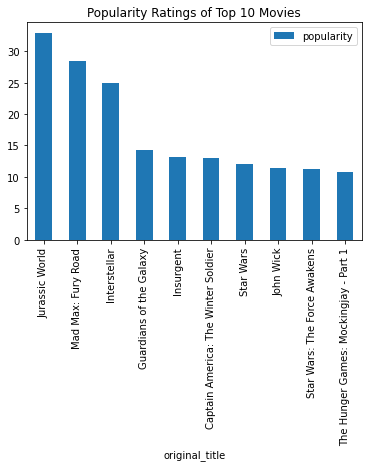

In [119]:
plot_top_ten(mp_movies.head(10), 'Popularity Ratings of Top 10 Movies')
plt.title('Popularity Ratings of Top 10 Movies');

The bar chart above shows Jurassic World as the most popular movie of all time

### Research Question 2: What movie generated the highest revenue?

This is similar to what was done in the first research question. Here, the table is going to be sorted by revenue and a graph will be plotted to determine the movie that generated the highest revenue.  

In [59]:
# displaying movies and their titles with high revenues in descending order
df[['original_title', 'revenue']].sort_values(by = 'revenue', ascending=False)

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
...,...,...
4815,3 Zimmer/KÃ¼che/Bad,0
4814,Any Day Now,0
4813,Smiley,0
4812,L'Attentat,0


In [60]:
hr_movies = df[['original_title', 'revenue']].sort_values(by = 'revenue', ascending=False)
hr_movies.head(10)

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


From the result above, it can be seen that Avatar is the movie that generated the highest revenue.
Visualizing this using a bar graph;

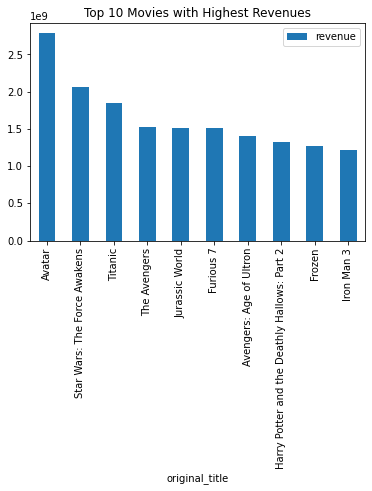

In [120]:
plot_top_ten(hr_movies.head(10), 'Top 10 Movies with Highest Revenues')
plt.title('Top 10 Movies with Highest Revenues');

### Research Question 3: What movies have the highest and lowest runtimes?

From code cell 6, we could see that the maximum runtime is 900, and the minimum runtime is 0. The following code will display the rows with the maximum runtime and the minimum runtimes

In [62]:
df[df['runtime'] == df['runtime'].max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,9/3/11,14,9.2,2011,0.0,0.0


From the above code, the movie with the highest runtime is **The Story of Film: An Odyssey**, corresponding to a runtime of 900. 

Now for the movie(s) with minimum runtime

In [63]:
df[df['runtime'] == df['runtime'].min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,11/10/15,20,6.6,2015,0.000000e+00,0.0
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,10/30/14,14,6.0,2014,0.000000e+00,0.0
1849,18247,0.120350,0,0,Spectacular!,Nolan Gerard Funk|Jesse Moss|Britt Irvin|Tammi...,Robert Iscove,0,Drama|Music,2/16/09,13,5.2,2009,0.000000e+00,0.0


In [64]:
# counting the number of minimum runtime
min_runtime = df[df['runtime'] == df['runtime'].min()]
min_runtime.count()

id                28
popularity        28
budget            28
revenue           28
original_title    28
cast              28
director          28
runtime           28
genres            28
release_date      28
vote_count        28
vote_average      28
release_year      28
budget_adj        28
revenue_adj       28
dtype: int64

The result shows that there are **28** movies with the minimum runtimes.

### Research Question 4: Is there a relationship between budget and revenue of movies?

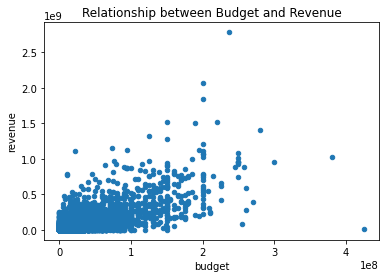

In [65]:
df.plot(x='budget', y='revenue', kind='scatter')
plt.title('Relationship between Budget and Revenue')
plt.show();

The scatterplot above shows a strong positive relationship/correlation between Budget and Revenue.

Checking if there is a condition whereby the higher the budget, the higher the revenue generated;

In [66]:
# finding the average revenue
avg_rev = df['revenue'].mean()
avg_rev

40319887.588016026

A high revenue indicates a revenue generated that is greater than or equal to the average revenue, while a low revenue indicates a revenue generated that is less than the average revenue.

In [67]:
# getting the movies with high revenue i.e. revenue >= average revenue
high_rev = df[df['revenue'] >= avg_rev]
high_rev

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,8469,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,109,Comedy,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08
10761,6081,1.090065,0,49579269,Revenge of the Pink Panther,Peter Sellers|Andrew Sachs|Herbert Lom|Burt Kw...,Blake Edwards,104,Action|Comedy|Thriller|Crime|Family,7/19/78,56,6.2,1978,0.000000e+00,1.657287e+08
10762,11778,0.959754,15000000,50000000,The Deer Hunter,Robert De Niro|John Cazale|John Savage|Christo...,Michael Cimino,183,Drama|War,12/8/78,464,7.4,1978,5.014051e+07,1.671350e+08
10764,11455,0.608679,0,41590893,Up in Smoke,Cheech Marin|Tommy Chong|Strother Martin|Edie ...,Lou Adler,86,Comedy,1/1/78,103,6.5,1978,0.000000e+00,1.390259e+08


In [68]:
# getting the movies with low revenue i.e. revenue < average revenue
low_rev = df[df['revenue'] < avg_rev]
low_rev

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
12,264660,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,1/21/15,2854,7.6,2015,1.379999e+07,3.391985e+07
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
35,264644,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117,Drama|Thriller,10/16/15,1520,8.0,2015,5.519998e+06,3.256960e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
42,321697,3.079522,30000000,34441873,Steve Jobs,Michael Fassbender|Kate Winslet|Seth Rogen|Kat...,Danny Boyle,122,History|Drama,10/9/15,1035,6.9,2015,2.759999e+07,3.168651e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


Finding the average budget that is above and below average revenue:

In [69]:
# average budget with high revenue
high_rev['budget'].mean()

52225932.346938774

In [70]:
# average budget with low revenue
low_rev['budget'].mean()

5394614.184489796

Visualizing this;

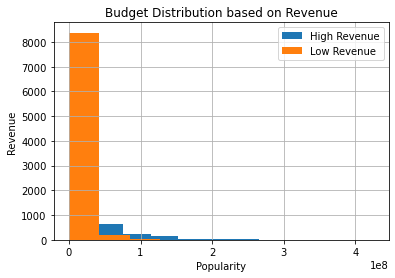

In [71]:
high_rev['budget'].hist(alpha=1.0, bins=10, label='High Revenue')
low_rev['budget'].hist(alpha=1.0, bins=10, label='Low Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.legend()
plt.title('Budget Distribution based on Revenue');

The bar chart above shows that movies that generated high revenues have high budget.

Limitations to this is the top movies with the largest budgets are not the ones that are generating the largest revenues.

<a id='conclusions'></a>
## Conclusions

1. The most popular movies of all time includes Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, and Insurgent among others.
2. The movie with the highest revenue generated is Avatar.
3. Movies that generated high revenues have high budget.
4. There is a strong positive relationship between budget and revenues generated.
5. The maximum runtime among the movies is 900, while the minimum is 0.

#### Limitation
1. With regards to the fourth research question, the scatter plot shows that there is a strong positive relationship between budget and revenue, but not in the case of 'the higher the budget, the higher the revenue generated'. Therefore, the top movies with the highest budget are not the top movies that generated the highest revenue.